## Latent Variable Analysis

### Spectral Unmixing: Non-negative Matrix Factorization

In [1]:
#%% 
# Load data
import scipy.io as sio
import numpy.matlib as nm
import matplotlib.pyplot as plt

t = sio.loadmat('bc_unsupervised.mat')
cmp = t['CMP']
tth = t['TTH']
xrd = t['XRD']
tth_ = nm.repmat(tth,xrd.shape[0],1)

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


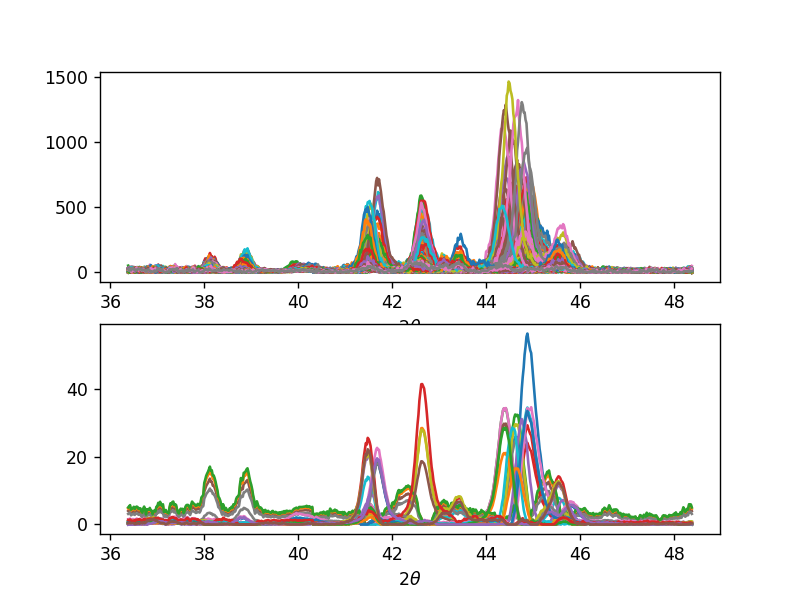

Text(0.5,0,'2$\\theta$')

In [3]:
#%% Plot the data
 
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(tth_.T, xrd.T)
plt.xlabel(r'2$\theta$')

### Run NMF on the full X-ray diffraction data set (full wafer).
* Can create a lower dimension representation of original data - abundance vector.

In [10]:
#%% Run NMF
from sklearn.decomposition import NMF
from random import randint

# How many endmembers? Will learn how to pick this during PCA. 
k = 7
model = NMF(n_components=k, init='random', random_state=randint(0, 1000))
endmembers = model.fit(xrd).components_ # X in our equation
abundances = model.transform(xrd) # beta in our equation

# plot the results
plt.figure(1)
plt.subplot(2,1,2)
plt.plot(tth_[0:6,:].T, endmembers[0:6,:].T)
plt.xlabel(r'2$\theta$')

# Run these steps a few times until you see a significant change.
# The endmembers change on each run!

C:\Users\Boo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,28.9028,'2$\\theta$')

<IPython.core.display.Javascript object>


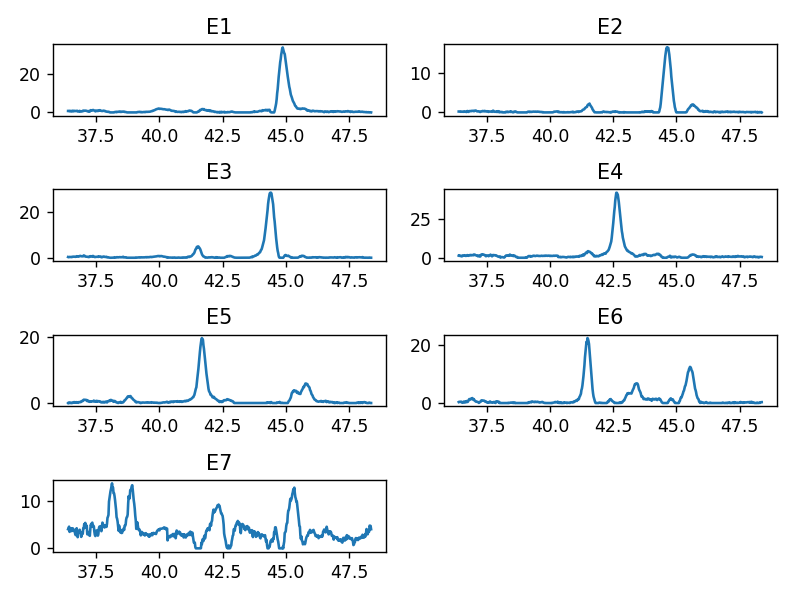

In [11]:
#%% plot the various endmembers
plt.figure(2)
plt.clf()

for i in range(0,k):
   plt.subplot(4,2,i+1)
   plt.plot(tth_[0,:], endmembers[i,:])
#   plt.xlabel(r'2$\theta$')
   plt.title('E' + str(i+1))
plt.tight_layout()

* Each person may get different results!
* This is because NMF gives a local minima solution.

<IPython.core.display.Javascript object>


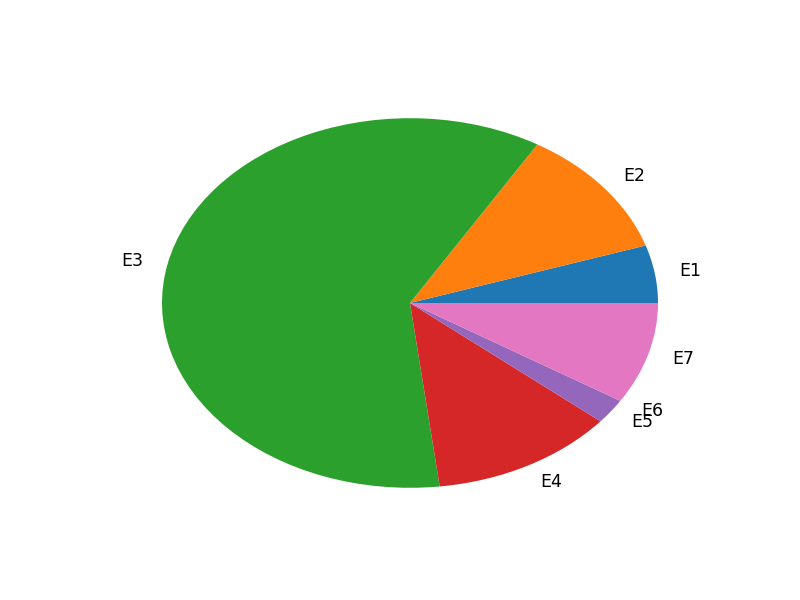

([<matplotlib.patches.Wedge at 0x244f6a07710>,
 [Text(1.08625,0.173377,'E1'),
  Text(0.859414,0.686591,'E2'),
  Text(-1.07594,0.2288,'E3'),
  Text(0.525499,-0.966359,'E4'),
  Text(0.891045,-0.645011,'E5'),
  Text(0.932947,-0.58276,'E6'),
  Text(1.05741,-0.303115,'E7')])

In [12]:
#%% plot the abundances for diffraction pattern 50
plt.figure(3)
plt.clf()
labels = ['E1','E2','E3','E4','E5','E6','E7']
plt.pie(abundances[49,:],labels = labels)

# Each person may get different results!
# This is because NMF gives a local minima solution.

### Latent Variable Analysis: Principal Component Analysis (PCA)

In [16]:
# compute PCA
from sklearn.decomposition import PCA

# subtract the mean - uses repmat
xrd_mean = xrd.mean(axis=0)
xrd_ = xrd - nm.repmat(xrd_mean,xrd.shape[0],1)

# run PCA on matrix xrd_
pca = PCA().fit(xrd_)
loading_vectors = pca.components_  # eigen vectors
explained_variance = pca.explained_variance_ # eigen values or variance
principal_components = pca.transform(xrd_) # map each diffraction pattern on the eigenvectors to get projections

<IPython.core.display.Javascript object>


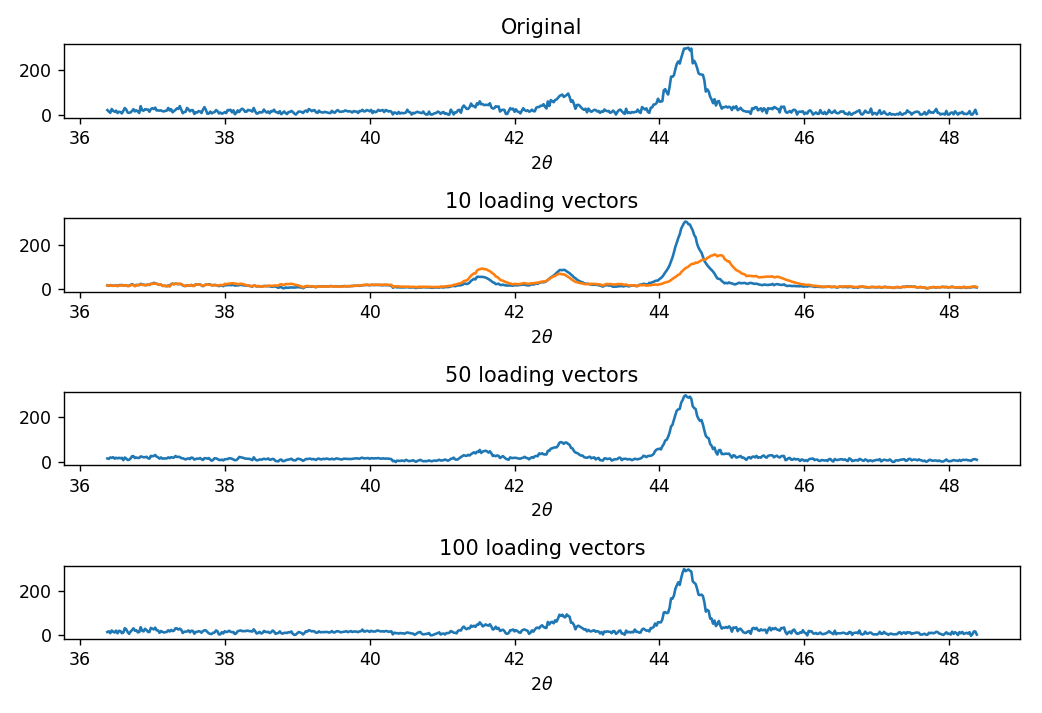

Text(0.5,0,'2$\\theta$')

In [17]:
#%% Compute PCA-based approximations for smoothing

# Here we select sample 50
N = 50
x = xrd[N-1,]

plt.figure(4)
plt.clf()
plt.subplot(4,1,1)
plt.plot(tth.flatten(),xrd[N-1,])
plt.title('Original')
plt.xlabel(r'2$\theta$')

In [23]:
#%%
# approximation with first 10 loading vectors
# Following equation given in slides

# identify the first 10 loading vectors
lv = loading_vectors[0:1,]

# multiply loading vectors by principle components
xa10 = nm.dot(principal_components[N-1,0:1], lv) + xrd_mean

# Plot approximation for 10 loading vectors
plt.figure(4)
plt.subplot(4,1,2)
plt.plot(tth.flatten(), xa10)
plt.xlabel(r'2$\theta$')
plt.title('10 loading vectors')

C:\Users\Boo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'10 loading vectors')

In [21]:
#%%

# approximation with first 50 loading vectors
lv = loading_vectors[0:50,]
xa50 = nm.dot(principal_components[N-1,0:50], lv) + xrd_mean

# approximation with first 100 loading vectors
lv = loading_vectors[0:100,]
xa100 =  nm.dot(principal_components[N-1,0:100], lv) + xrd_mean

In [22]:
#%%
# plot approximation for 50 PCs
plt.figure(4)
plt.subplot(4,1,3)
plt.plot(tth.flatten(), xa50)
plt.xlabel(r'2$\theta$')
plt.title('50 loading vectors')

# plot approximation for 100 PCs
plt.subplot(4,1,4)
plt.plot(tth.flatten(), xa100)
plt.xlabel(r'2$\theta$')
plt.title('100 loading vectors')

plt.tight_layout()

<IPython.core.display.Javascript object>


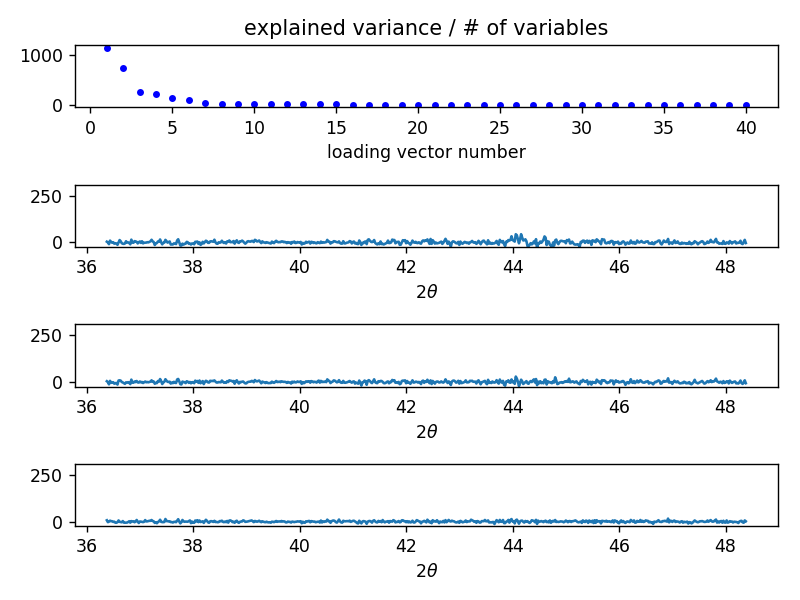

In [24]:
#%% Investigate left over information

# compute remaining information for each approximation:
# multiple the remaining principle components by the remaining loading vectors

xa10_remaining = nm.dot(principal_components[N-1,10:], loading_vectors[10:,])

xa50_remaining = nm.dot(principal_components[N-1,50:],  loading_vectors[50:,]) 

xa100_remaining = nm.dot(principal_components[N-1,100:],  loading_vectors[100:,])


# plot the left over information
plt.figure(6)
plt.clf()
plt.subplot(4,1,2)
plt.plot(tth.flatten(), xa10_remaining)
plt.xlabel(r'2$\theta$')
plt.ylim([-25, 310])

plt.subplot(4,1,3);
plt.plot(tth.flatten(), xa50_remaining)
plt.xlabel(r'2$\theta$')
plt.ylim([-25, 310])

plt.subplot(4,1,4);
plt.plot(tth.flatten(), xa100_remaining)
plt.xlabel(r'2$\theta$')
plt.ylim([-25, 310])

plt.tight_layout()

In [25]:
#%% plot the variance per variable for each loading vector
# This plot shows the variance explained by each loading vector.
# Can use this to select number of loading vectors to use for approximation.

plt.figure(6)
plt.subplot(4,1,1)
plt.plot(nm.arange(1,41),explained_variance[0:40]/tth_.shape[1],'b.')
plt.xlabel('loading vector number')
plt.title('explained variance / # of variables')

plt.tight_layout()

In [26]:
#%% Visualizing data in lower dimension

# create data sets 1 and 2
xrd1 = xrd[189:196,:] # data set 1
xrd2 = xrd[0:7,:] # data set 2

# Combine data into one matrix.
s = nm.concatenate((xrd1, xrd2), axis=0) 

<IPython.core.display.Javascript object>


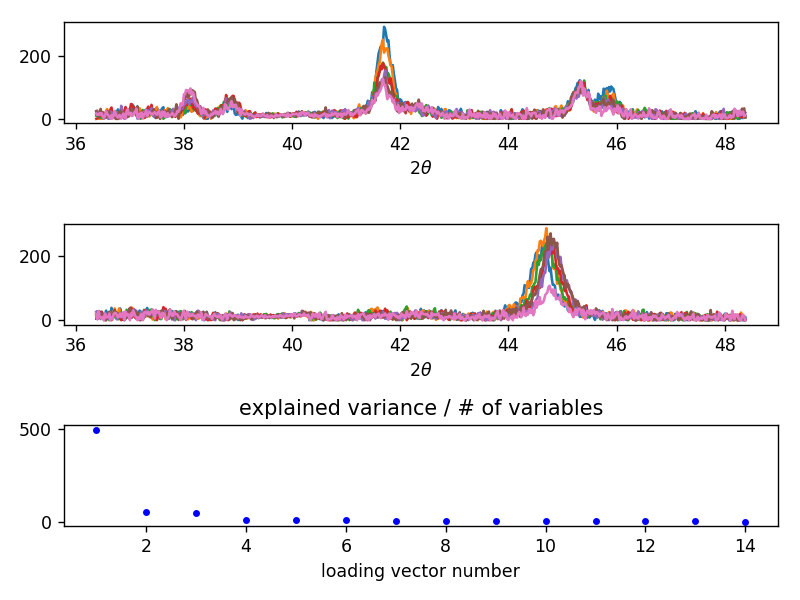

Text(0.5,0,'2$\\theta$')

In [27]:
#%% Plot data sets
plt.figure(7)
plt.clf()
plt.subplot(3,1,1)
plt.plot(tth_[0:7,:].T, xrd1.T)
plt.xlabel(r'2$\theta$')

plt.subplot(3,1,2)
plt.plot(tth_[0:7,:].T, xrd2.T)
plt.xlabel(r'2$\theta$')

In [28]:
#%% Run PCA on this data set
# compute PCA for XRD
# !!!!
s_mean = s.mean(axis=0)
s_ = s - nm.repmat(s_mean,s.shape[0],1)

pca = PCA().fit(s_)
loading_vectors = pca.components_
explained_variance = pca.explained_variance_
principal_components = pca.transform(s_)

In [29]:
#%% Plot the variance/#variables for each loading vector
plt.figure(7)
plt.subplot(3,1,3)
plt.plot(nm.arange(1,15),explained_variance/tth_.shape[1],'b.')
plt.xlabel('loading vector number')
plt.title('explained variance / # of variables')
plt.tight_layout()

<IPython.core.display.Javascript object>


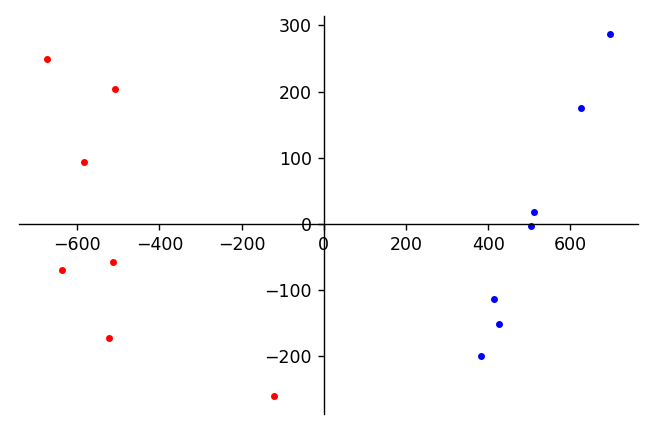

In [30]:
#%% Plot the data in 2D: 1st Principle Component vs 2nd Principle Component
fig, ax = plt.subplots()

# plot class 1
plt.plot(principal_components[0:7,0], principal_components[0:7,1],'b.')

# plot class 2
plt.plot(principal_components[7:14,0], principal_components[7:14,1],'r.')

# set the x-spine 
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.tight_layout()

<IPython.core.display.Javascript object>


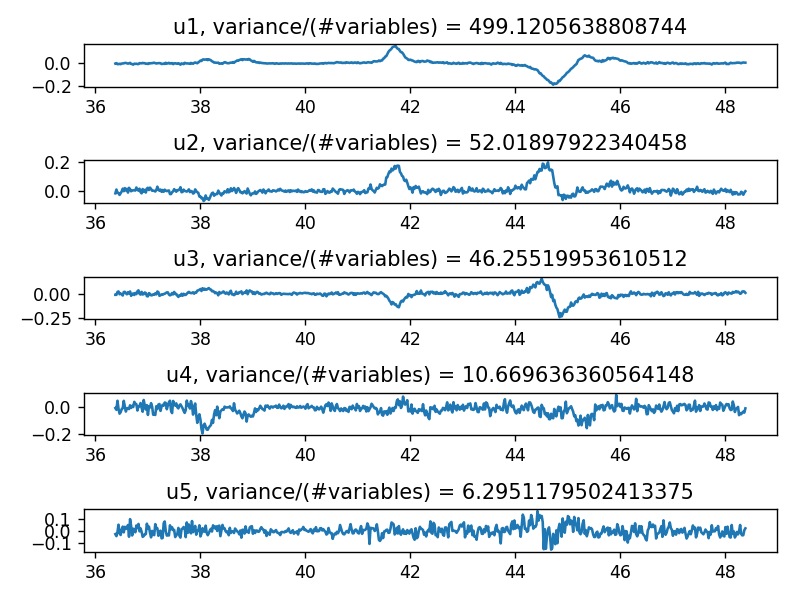

In [31]:
#%% Visualize the loading vectors

k = 5
plt.figure(9)
plt.clf()
# plot each loading vector
for i in range(0,k):
   plt.subplot(k,1,i+1)
   plt.plot(tth_[0,:], loading_vectors[i,:])
   plt.title('u' + str(i+1) + ', variance/(#variables) = ' + str(explained_variance[i]/tth_.shape[1]))
plt.tight_layout()

<IPython.core.display.Javascript object>


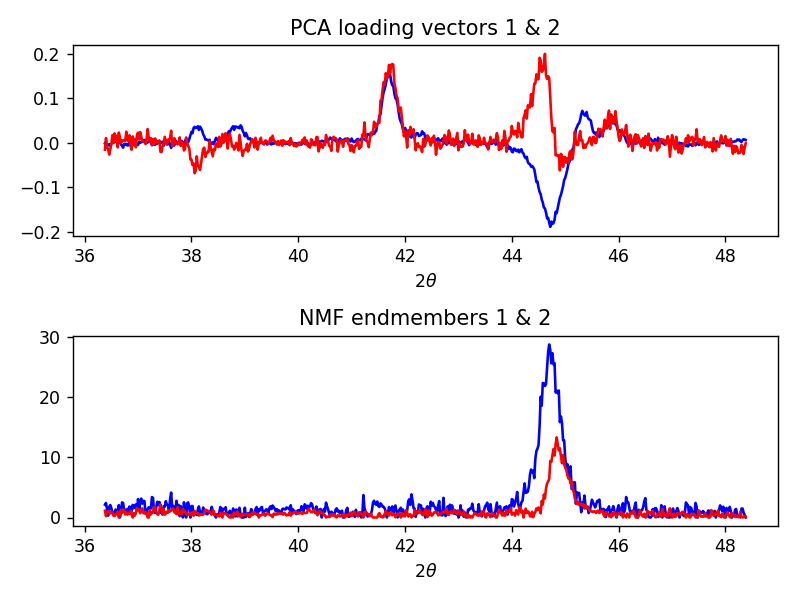

Text(0.5,1,'PCA loading vectors 1 & 2')

In [32]:
#%% Compare PCA loading vectors to NMF Endmembers
plt.figure(10)
plt.clf()
plt.subplot(2,1,1)
plt.plot(tth_[0,:], loading_vectors[0,:],'b')
plt.plot(tth_[0,:], loading_vectors[1,:],'r')
plt.xlabel(r'2$\theta$')
plt.title('PCA loading vectors 1 & 2')

In [33]:
#%% Compute NMF endmembers
model = NMF(n_components=k, init='random', random_state=randint(0, 1000))
endmembers = model.fit(s).components_
abundances = model.transform(s)
plt.subplot(2,1,2)
plt.cla()
plt.plot(tth_[0,:], endmembers[0,:],'b')
plt.plot(tth_[0,:], endmembers[1,:],'r')
plt.xlabel(r'2$\theta$')
plt.title('NMF endmembers 1 & 2')
plt.tight_layout()

<IPython.core.display.Javascript object>


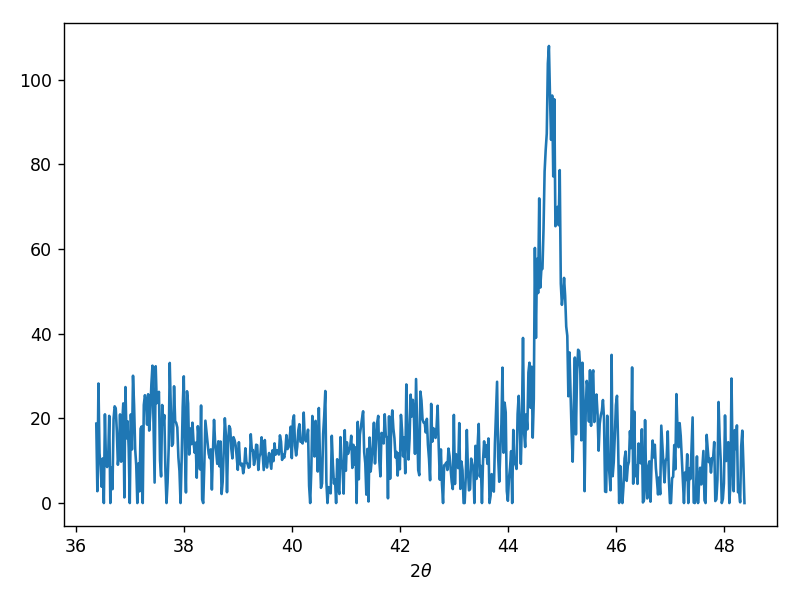

In [34]:
#%% PCA for outlier detection
plt.figure(11)
plt.clf()
plt.plot(tth_[0,],s[13,])
plt.xlabel(r'2$\theta$')
plt.tight_layout()

<IPython.core.display.Javascript object>


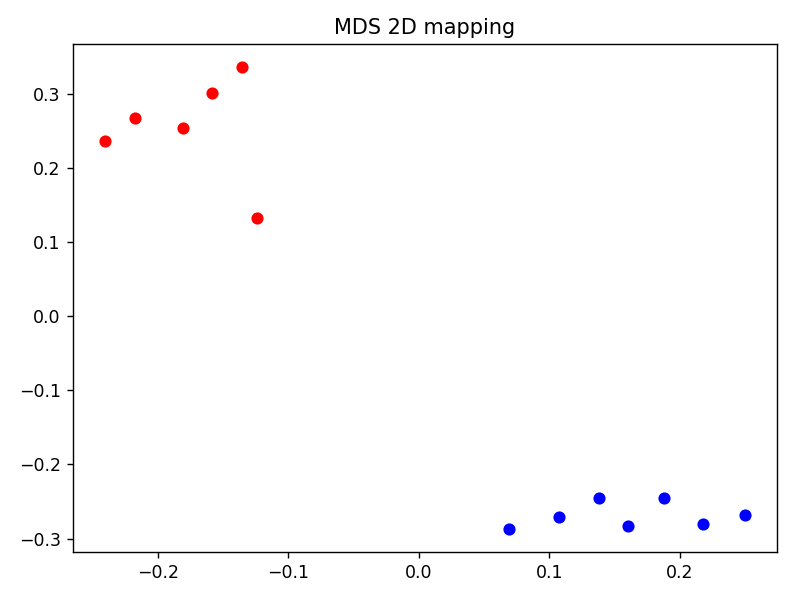

In [35]:
#%% ----------- Multidimensional Data Scaling --------------------------
# Look at multidimensional data scaling of cosine dissimilarity

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

# compute the cosine dissimilarity for the collection of samples
d = pairwise_distances(s, metric = 'cosine')

# Create MDS model
mds = MDS(n_components=2, dissimilarity="precomputed")

# Identify MDS mapping for our data
pos = mds.fit(d).embedding_

# MDS of 'D' in 2D
plt.figure(12)
plt.clf()
plt.plot(pos[0:7,0],pos[0:7,1],'bo')
plt.plot(pos[8:15,0],pos[8:15,1],'ro')
plt.title('MDS 2D mapping')
plt.tight_layout()

In [ ]:
#%% Our XRD are now mapped to MDS space.
# Lets see how well MDS represented the dissimilarity measure for our samples.

# Compute euclidean dissimilarity in the MDS space
d_MDS = pairwise_distances(pos, metric = 'euclidean')

plt.figure(13)
plt.clf()
plt.subplot(1,2,1)
plt.pcolor(d)
plt.gca().invert_yaxis()
plt.title('cosine metric on XRD')
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolor(d_MDS)
plt.gca().invert_yaxis()
plt.title('MDS mapped dissimilarity')
plt.colorbar()

plt.tight_layout()

In [ ]:
#%% Now lets look at MDS applied to the full set of XRD

# Compute cosine dissimilarity + do MDS mapping
d = pairwise_distances(xrd, metric = 'cosine')
mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit(d).embedding_

# Compute euclidean dissimilarity in MDS space
d_MDS = pairwise_distances(pos, metric = 'euclidean')

plt.figure(14)
plt.clf()
plt.subplot(1,2,1)
plt.pcolor(d)
plt.gca().invert_yaxis()
plt.title('cosine metric on XRD')
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolor(d_MDS)
plt.gca().invert_yaxis()
plt.title('MDS mapped dissimilarity')
plt.colorbar()